<a href="https://colab.research.google.com/github/Manish-Kaswan/ML-colab-notebooks/blob/main/logistic_regression_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1])

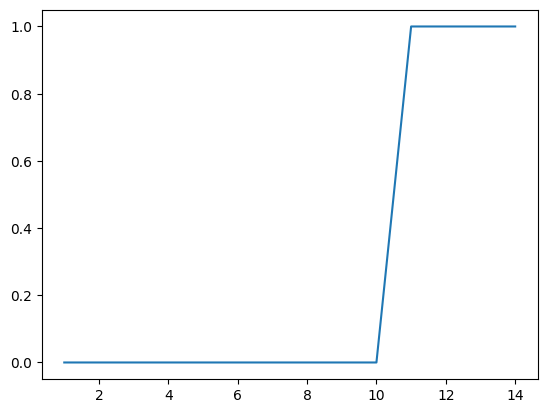

In [3]:
plt.plot(x,y)
plt.show()
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [4]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

In [15]:
def compute_cost_logistic(X, y, w, b, lambda_=0, safe=False):
    """
    Computes cost using logistic loss, non-matrix version

    Args:
      X (ndarray): Shape (m,n)  matrix of examples with n features
      y (ndarray): Shape (m,)   target values
      w (ndarray): Shape (n,)   parameters for prediction
      b (scalar):               parameter  for prediction
      lambda_ : (scalar, float) Controls amount of regularization, 0 = no regularization
      safe : (boolean)          True-selects under/overflow safe algorithm
    Returns:
      cost (scalar): cost
    """

    m,n = X.shape
    cost = 0.0
    for i in range(m):
        z_i    = np.dot(X[i],w) + b                                             #(n,)(n,) or (n,) ()
        if safe:  #avoids overflows
            cost += -(y[i] * z_i ) + log_1pexp(z_i)
        else:
            f_wb_i = sigmoid(z_i)                                                   #(n,)
            cost += -y[i] * np.log(f_wb_i + 1e-8) - (1 - y[i]) * np.log(1 - f_wb_i + 1e-8)       # scalar
    cost = cost/m

    reg_cost = 0
    if lambda_ != 0:
        for j in range(n):
            reg_cost += (w[j]**2)                                               # scalar
        reg_cost = (lambda_/(2*m))*reg_cost

    return cost + reg_cost


def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out

In [7]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing


In [18]:
w_tmp = np.zeros_like(x[0])
b_tmp = 0
alpha = 0.1
iters = 12000
w_out, b_out, _ = gradient_descent(x, y, w_tmp, b_tmp, alpha,iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

<ipython-input-4-5c3c1af3bdae>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar


Iteration    0: Cost [0.68902408]   
Iteration 1200: Cost [0.17743587]   
Iteration 2400: Cost [0.13528955]   
Iteration 3600: Cost [0.11548988]   
Iteration 4800: Cost [0.10319037]   
Iteration 6000: Cost [0.09452028]   
Iteration 7200: Cost [0.08794465]   
Iteration 8400: Cost [0.08271259]   
Iteration 9600: Cost [0.07840602]   
Iteration 10800: Cost [0.07477056]   

updated parameters: w:[1.54464482], b:[-16.11429516]


In [19]:
x_test = np.array([15,9,17,200,1])
y_test = np.array([1,0,1,1,0])
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
#print(compute_cost_logistic(x_test,y_test,w_out,b_out))

In [20]:
#w_out = 1.45
#b_out = -15.07
y_pred = []
for i in range(x_test.shape[0]):
  y_pred.append(sigmoid(x_test[i]*w_out+b_out))
print(y_pred)
print(compute_cost_logistic(x_test,y_test,w_out,b_out))
print(compute_cost_logistic(x_test,y_pred,w_out,b_out))

[array([0.99913799]), array([0.09863432]), array([0.99996072]), array([1.]), array([4.70414881e-07])]
[0.02094927]
